## 1. Importing Libraries

In [5]:
import pandas as pd
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

## 2. Data Preparation

In [8]:
df = pd.read_csv('StressLevelDataset.csv')
df['sleep_quality'] = 2 * df['sleep_quality']
data_cleaned_drop = df.dropna(subset=['sleep_quality'])  # Example for cleaning

## 3. Train-Test Split and Model Training

In [11]:
X = data_cleaned_drop.drop('sleep_quality', axis=1)
y = data_cleaned_drop['sleep_quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

rf_model_optimal = grid_search.best_estimator_

## 4. Model Evaluation

In [14]:
mse = mean_squared_error(y_test, rf_model_optimal.predict(X_test))
r_squared = r2_score(y_test, rf_model_optimal.predict(X_test))

print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

Mean Squared Error: 3.3918056670468486
R-squared: 0.6599087758024225


## 5. Feature Importance

In [17]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model_optimal.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)


Feature Importances:
                         Feature  Importance
13  teacher_student_relationship    0.494394
0                  anxiety_level    0.086283
17    extracurricular_activities    0.060642
18                      bullying    0.046198
3                     depression    0.045416
16                 peer_pressure    0.038405
1                    self_esteem    0.037083
19                  stress_level    0.031388
4                       headache    0.029483
9                         safety    0.021476
8              living_conditions    0.020245
6              breathing_problem    0.013784
12                    study_load    0.013729
14        future_career_concerns    0.013692
10                   basic_needs    0.013631
7                    noise_level    0.011444
11          academic_performance    0.011372
15                social_support    0.007421
2          mental_health_history    0.002526
5                 blood_pressure    0.001389


## 6. Visualization

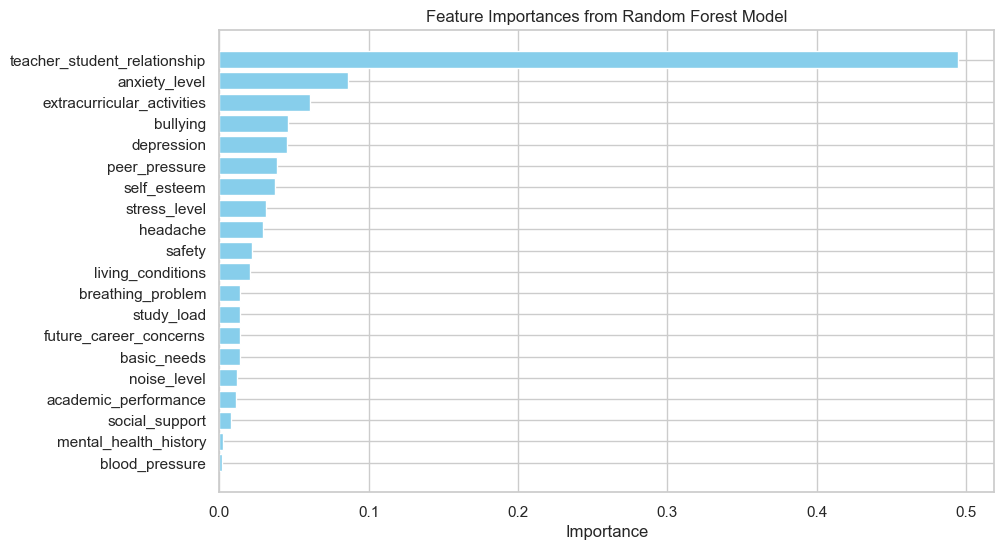

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest Model')
plt.gca().invert_yaxis()
plt.show()